<a href="https://colab.research.google.com/github/NahuelCostaCortez/rapidae/blob/main/examples/denoising_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Denoising Autoencoder with MNIST dataset

Unlike traditional autoencoders that aim to reconstruct the input from a compressed representation, denoising autoencoders are trained to reconstruct clean, uncorrupted data from noisy or partially obscured input. The training process involves introducing noise or distortion to the input data and then training the autoencoder to recover the original, clean data. This approach encourages the model to learn robust features that capture the essential information needed to reconstruct the clean input, making it less sensitive to irrelevant or noisy details. Denosing autoencoders find applications in various areas, including image denoising, data compression, and feature learning, where the goal is to extract meaningful representations from noisy or imperfect data.

In [1]:
# Install the library

!pip install rapidae

In [3]:
import keras
from rapidae.data import load_MNIST
from rapidae.data import plot_reconstructions, add_noise
from rapidae.models import AE
from rapidae.models.base import VanillaEncoder, VanillaDecoder
from rapidae.pipelines import TrainingPipeline

### Download and preprocess the dataset

Download and preprocess the dataset. In this example, the selected dataset is the well-known MNIST composed of handwritten digit images.

Train and test data are normalized and flatten since we are going to use a non convolutional autoencoder.

Since we want to train a denoising autoencoder, we also need to add some noise to the images.
The noise factor should be a float between 0 and 1 depending the intensity of the noise.

The used autoencoder to denoise the images uses Dense layers so the images should be flattened before used as inputs.

In [4]:
# Load MNIST dataset
x_train, y_train, x_test, y_test = load_MNIST()

# Add noise to the train and test data
x_train_noisy = add_noise(x_train, noise_factor=0.3)
x_test_noisy = add_noise(x_test, noise_factor=0.3)

# Flatten data
x_train = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255
x_train_noisy = x_train_noisy.reshape(x_train_noisy.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255
x_test_noisy = x_test_noisy.reshape(x_test_noisy.shape[0], -1)

2024-01-15 13:07:25 [INFO]: train-images-idx3-ubyte.gz already exists.
2024-01-15 13:07:25 [INFO]: train-labels-idx1-ubyte.gz already exists.
2024-01-15 13:07:25 [INFO]: t10k-images-idx3-ubyte.gz already exists.
2024-01-15 13:07:25 [INFO]: t10k-labels-idx1-ubyte.gz already exists.


### Model creation

Since the denoising autoencoder in structure is a vanilla autoencoder (only its functionality varies), the encoder and decoder are the vanilla ones, depth of the network and number of neurons per layer can be defined by using the layers_conf parameter.
The latent_dim determinates the dimensionality of the latent space.

In [5]:
# Model creation
model = AE(input_dim=x_train_noisy.shape[1], latent_dim=10,
           encoder=VanillaEncoder, decoder=VanillaDecoder, layers_conf=[64, 32])

### Training pipeline

Define the training pipeline. There you can fix some hyperparameters related to the training phase of the autoencoder, like learning rate, bath size, numer of epochs, etc.
Here you can define callbacks to the model.
Also the pipeline's name can be customized to facilitate the identification of the corresponding folder with the saved models inside output_dir folder.

In [6]:
pipe = TrainingPipeline(name='training_pipeline_denoising_ae',
                        model=model, num_epochs=50)

trained_model = pipe(x=x_train_noisy, y=x_train)

2024-01-15 13:07:27 [INFO]: +++ training_pipeline_denoising_ae +++
2024-01-15 13:07:27 [INFO]: Creating folder in ../output_dir/training_pipeline_denoising_ae_2024-01-15_13-07-27


Epoch 1/50

Epoch 1: loss improved from inf to 0.09122, saving model to ../output_dir/training_pipeline_denoising_ae_2024-01-15_13-07-27/model.weights.h5
469/469 - 2s - 4ms/step - loss: 0.0912
Epoch 2/50

Epoch 2: loss improved from 0.09122 to 0.06862, saving model to ../output_dir/training_pipeline_denoising_ae_2024-01-15_13-07-27/model.weights.h5
469/469 - 2s - 4ms/step - loss: 0.0686
Epoch 3/50

Epoch 3: loss improved from 0.06862 to 0.06407, saving model to ../output_dir/training_pipeline_denoising_ae_2024-01-15_13-07-27/model.weights.h5
469/469 - 2s - 3ms/step - loss: 0.0641
Epoch 4/50

Epoch 4: loss improved from 0.06407 to 0.06193, saving model to ../output_dir/training_pipeline_denoising_ae_2024-01-15_13-07-27/model.weights.h5
469/469 - 2s - 4ms/step - loss: 0.0619
Epoch 5/50

Epoch 5: loss improved from 0.06193 to 0.05995, saving model to ../output_dir/training_pipeline_denoising_ae_2024-01-15_13-07-27/model.weights.h5
469/469 - 2s - 4ms/step - loss: 0.0600
Epoch 6/50

Epoch 6

### Evaluation step 

Finally the original images with noise can be graphically compared with the output images of the autoencoder.
As you can see, the added noise of the input images has largely disappeared.

 47/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


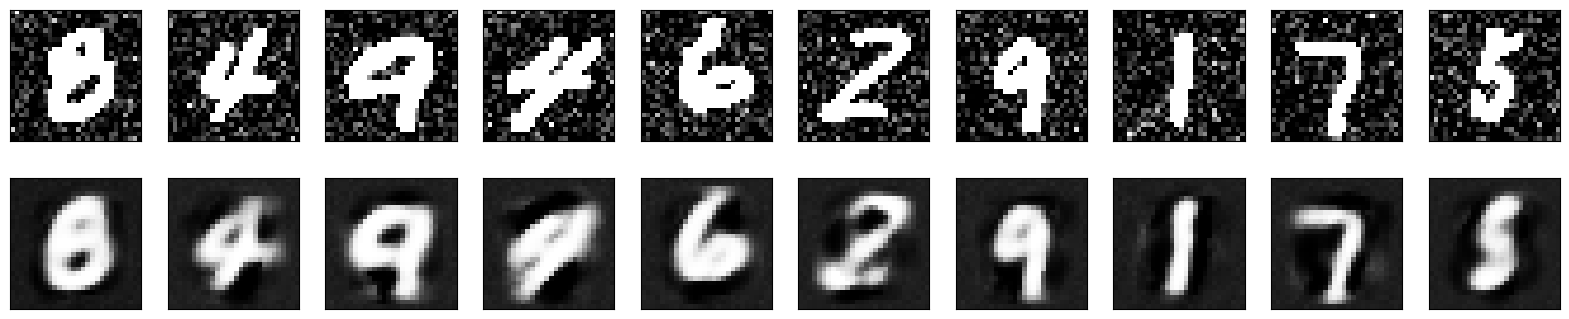

In [7]:
outputs = trained_model.predict(x_test_noisy)
plot_reconstructions(x_test_noisy, outputs['recon'])